## prediction heart disease using machine learning

this notebook looks into using various python-based machine ;earning and data science libraries in an ettempt to build a machine learning model capable of predict whether or not someone has cancer disease based on their medical attribute

we're goint to take the following approach:

1. problem definition
2. data
3. evaluation
4. features
5. modelling
6. experimentation 

## 1. problem definition
in a statement,

>given clinical parameters about a patient, can we predict whether the cancer melginant or bangin?

## 2. Data 

the origional data came from............link or resourse..............

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

#evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [3]:
#import dataset of breast cancer
df = pd.read_csv("data breast.csv")
df.head()
#df.shape #(rows, columns)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


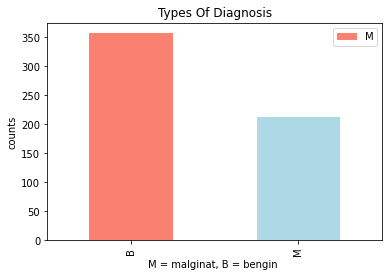

In [4]:
df["diagnosis"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.title("Types Of Diagnosis")
plt.xlabel("M = malginat, B = bengin ")
plt.ylabel("counts")
plt.legend(["M", "B"])

In [5]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

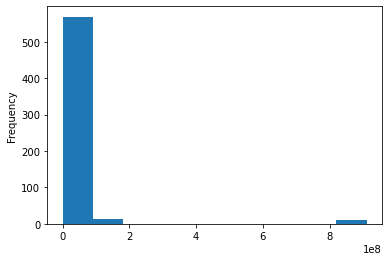

In [6]:
df.plot.hist(legend=False);

In [7]:
df.drop("Unnamed: 32", axis=1, inplace=True)

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Mapping M to 1 and B to 0 in diagnosis col.
df.diagnosis = df.diagnosis.map({'M':1,'B':0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
# Feature & labels
X, y = df.iloc[:,1:], df.iloc[:,0]
print(f'Shape of X, y is : {X.shape, y.shape}, resp.')

Shape of X, y is : ((569, 31), (569,)), resp.


In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
# As our dataset is balanced (around 60-40 ratio), there is no need to balance our data
df.diagnosis.value_counts(normalize = True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

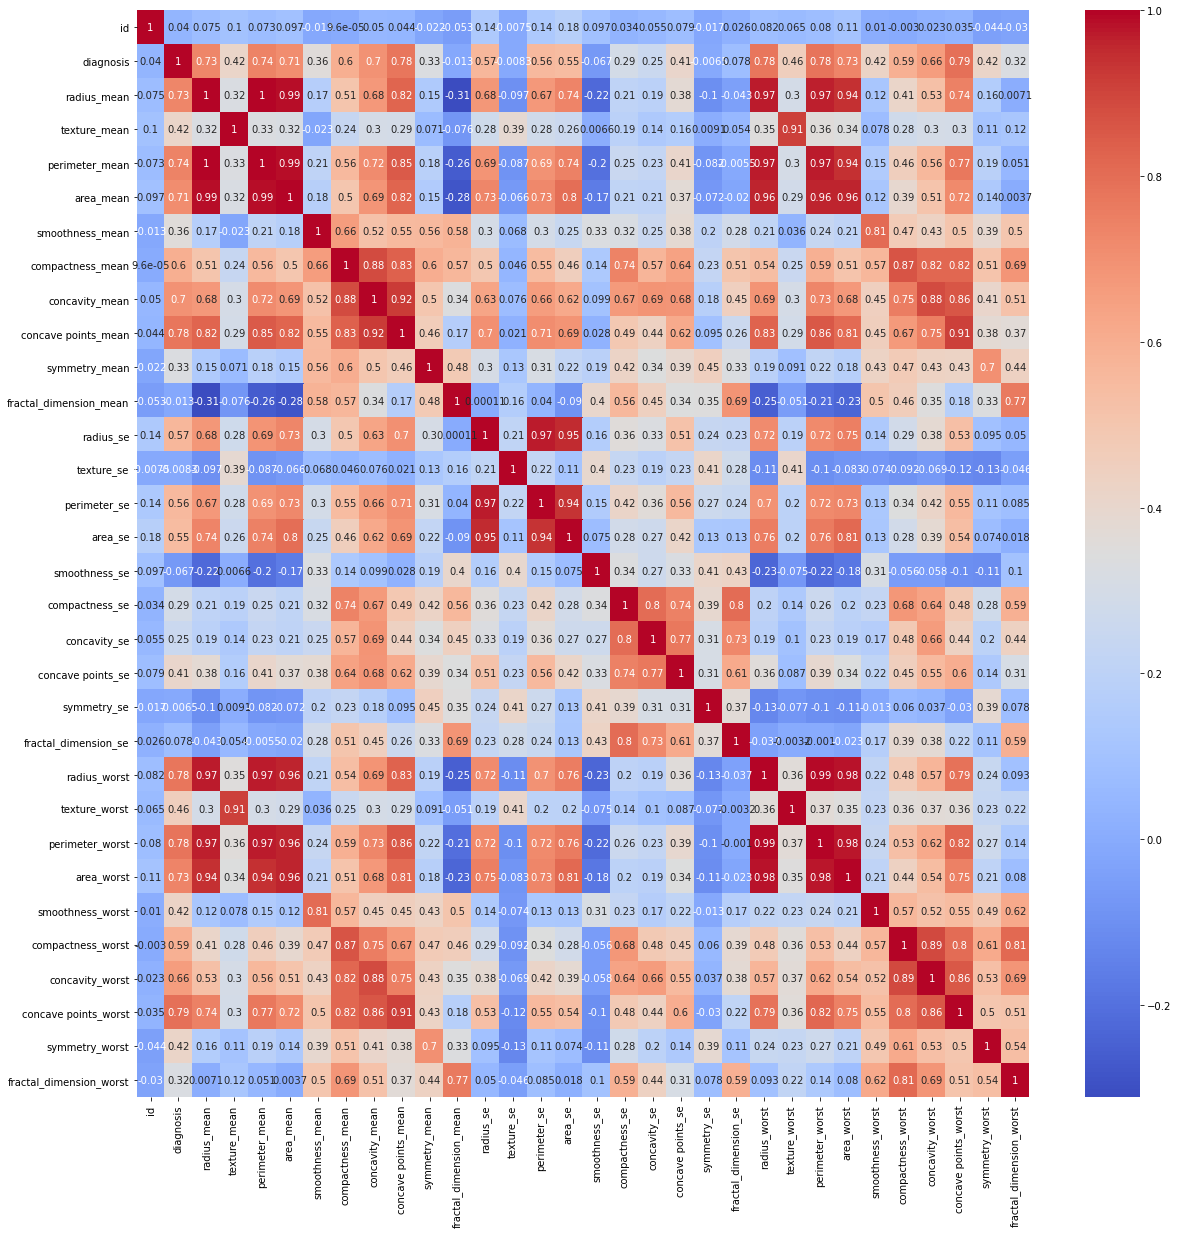

In [14]:
# Finding correlation among features using sns' heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

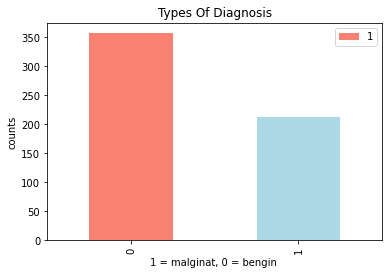

In [15]:
df["diagnosis"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.title("Types Of Diagnosis")
plt.xlabel("1 = malginat, 0 = bengin ")
plt.ylabel("counts")
plt.legend(["1", "0"])

In [16]:
# removing features that are less correlated with our target variable
df.corr().diagnosis[df.corr().diagnosis<=0.2]

id                        0.039769
fractal_dimension_mean   -0.012838
texture_se               -0.008303
smoothness_se            -0.067016
symmetry_se              -0.006522
fractal_dimension_se      0.077972
Name: diagnosis, dtype: float64

In [17]:
df.shape

(569, 32)

In [18]:
less_corr = df.corr().diagnosis[df.corr().diagnosis<=0.2].index

In [19]:
df = df.drop(less_corr,axis=1)

In [20]:
df.shape

(569, 26)

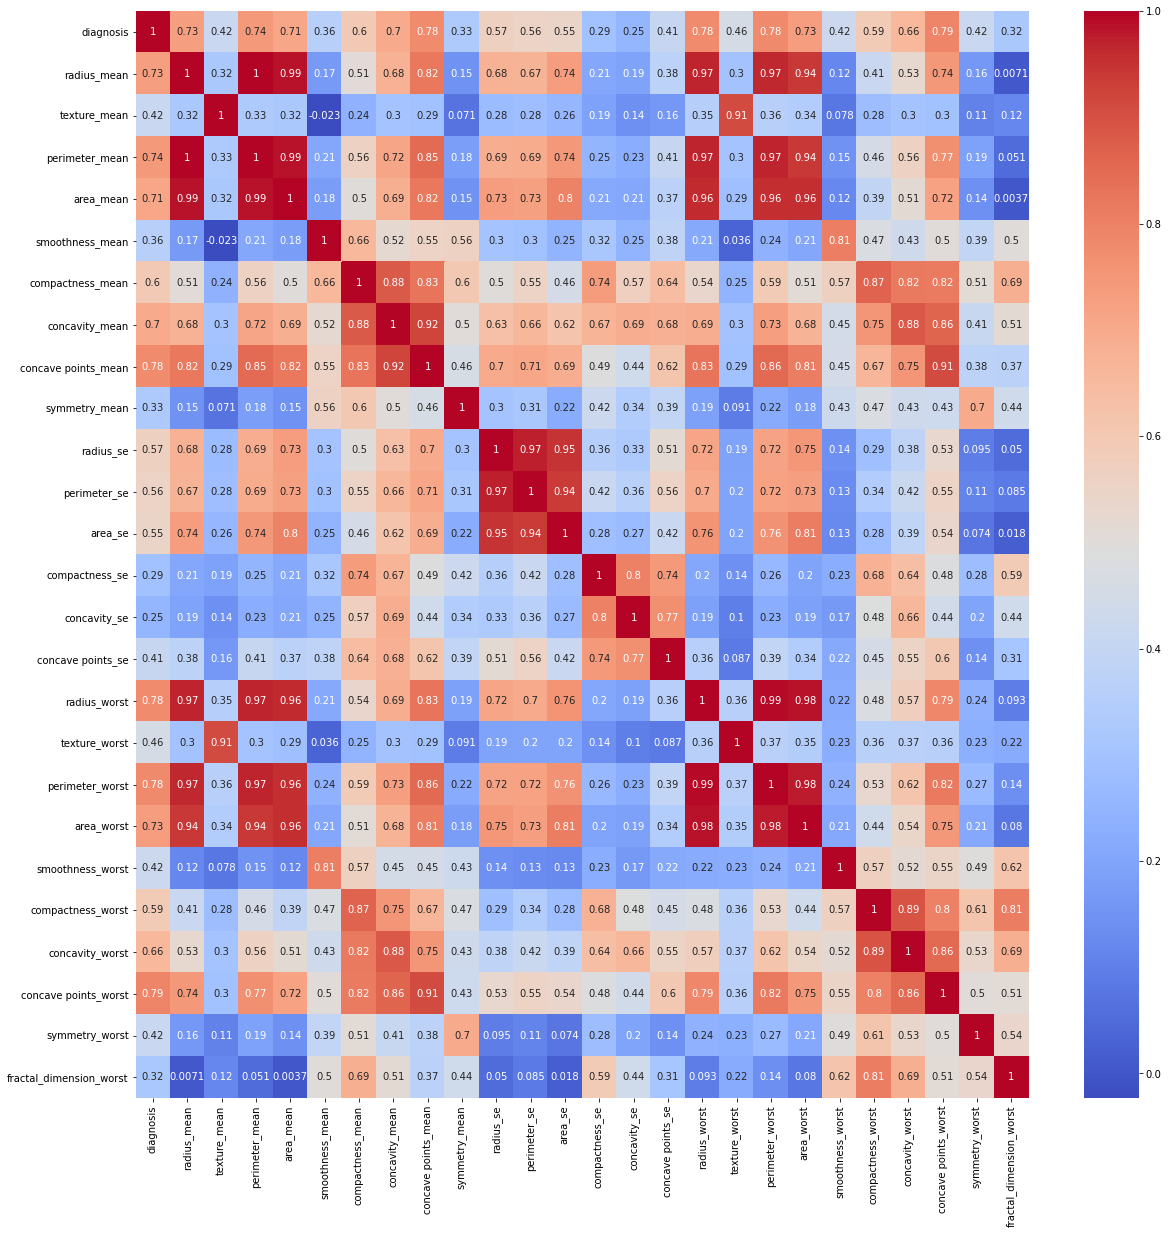

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
x = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [23]:
x_train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,0,10.050,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,...,11.160,26.84,71.98,384.0,0.14020,0.14020,0.1055,0.06499,0.2894,0.07664
427,0,10.800,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,...,12.760,32.04,83.69,489.5,0.13030,0.16960,0.1927,0.07485,0.2965,0.07662
406,0,16.140,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,...,17.710,19.58,115.90,947.9,0.12060,0.17220,0.2310,0.11290,0.2778,0.07012
96,0,12.180,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,...,12.830,20.92,82.14,495.2,0.11400,0.09358,0.0498,0.05882,0.2227,0.07376
490,0,12.250,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,...,14.170,31.99,92.74,622.9,0.12560,0.18040,0.1230,0.06335,0.3100,0.08203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,1,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.2210,0.12940,0.2567,0.05737
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.22100,0.4366,0.20750
359,0,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,...,12.020,25.02,75.79,439.6,0.13330,0.10490,0.1144,0.05052,0.2454,0.08136
192,0,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0000,0.00000,0.1909,0.06559


In [24]:
y_train, len(y_train)

(338    0
 427    0
 406    0
 96     0
 490    0
       ..
 277    1
 9      1
 359    0
 192    0
 559    0
 Name: diagnosis, Length: 455, dtype: int64,
 455)

In [25]:
# put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

#create a function to fit and score model 
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    fit and evaluates given machine learning models.
    models : a dict of differetn scikit-learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    np.random.seed()
    # Make a dictionary to keep model score 
    model_scores = {}
    #loop through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(x_train, y_train)
        #evaluate the model and append its score to model_score
        model_scores[name] = model.score(x_test, y_test)
    return model_scores    

In [26]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\Shahzad Ahmad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 1.0, 'KNN': 0.9385964912280702, 'Random Forest': 1.0}

### Model Comparison

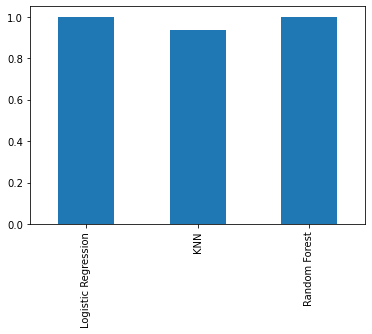

In [27]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(legend=False);

now we've got a baseline model... and we know a model's first
predictions aren't always what we should based our next steps off.
what should do?

lets look at the following:

* hyperparameter tuning
* features importance
* confusion matrix
* cross-validation
* precision
* recall
* f1 score
* classification report
* ROC curve
* area under the curve

### Hyperparameter Tuning



In [28]:
# let's tune KNN

train_scores = []
test_scores = [] 

#crete a list of diffeent values for n_neighbours
neighbors = range(1, 21)

#setup KNN instance 
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the model
    knn.fit(x_train, y_train)
    
    #update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    #update the test score list
    test_scores.append(knn.score(x_test, y_test))
    

In [29]:
train_scores

[1.0,
 0.9472527472527472,
 0.9626373626373627,
 0.9406593406593406,
 0.9494505494505494,
 0.9428571428571428,
 0.9340659340659341,
 0.9384615384615385,
 0.9362637362637363,
 0.9362637362637363,
 0.9384615384615385,
 0.9340659340659341,
 0.9318681318681319,
 0.9384615384615385,
 0.9340659340659341,
 0.9274725274725275,
 0.9296703296703297,
 0.9274725274725275,
 0.9252747252747253,
 0.9296703296703297]

In [30]:
test_scores


[0.9122807017543859,
 0.9298245614035088,
 0.9122807017543859,
 0.9298245614035088,
 0.9385964912280702,
 0.956140350877193,
 0.9473684210526315,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544]

In [31]:
# let's tune KNN

train_scores = []
test_scores = [] 

#crete a list of diffeent values for n_neighbours
neighbors = range(1, 21)

#setup KNN instance 
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the model
    knn.fit(x_train, y_train)
    
    #update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    #update the test score list
    test_scores.append(knn.score(x_test, y_test))
    

## Hypereparameters Tuning with RandomReasearchCV

we're going to tune:

   * LogisticRegression()
   * RandomForsetClassifier()
   
   ...using RandomResearchCV

In [32]:
#create a Hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

#create hyperparameter grid for randomforestclassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

now we've got hyperparameter grid setup of each of our models, let's tune them using
RandomizedSearchCV.

In [33]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# tune logisticregression

np.random.seed()

#setup random hyperparameter search for logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                               # n_iter=20,
                               verbose=True)

#fut random hyperparameter search model for logisticregression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [35]:
rs_log_reg.score(x_test, y_test)

1.0

#### now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()..

In [36]:
np.random.seed()

#setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                               # n_iter=20,
                               verbose=True)

#fut random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
#find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 410,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': None}

In [38]:
#evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

1.0

In [39]:
model_scores

{'Logistic Regression': 1.0, 'KNN': 0.9385964912280702, 'Random Forest': 1.0}

## hyperparameter tuning with GridSearchCV

since our regression model provide the best score so far, we'll try improve them again using GridSearchCV..

In [40]:
#different hyperparameter for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

#setup grid hyperparameter search for logisticregression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#fit grid hyperparameter search model 
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
#check the best hyperparameter
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(x_test, y_test)

1.0

In [43]:
model_scores

{'Logistic Regression': 1.0, 'KNN': 0.9385964912280702, 'Random Forest': 1.0}

## Evaluating our tuned machine learning classifier, beyond acciracy

 * ROC curve and AUC score 
 * confusion matrix
 * classification report 
 * precision 
 * recall 
 * F1 score
 
 .....and it would be great if cross-validation was used wheer possible
 
 to make comparison and evaluate our trained model,first we need to make predictions. 

In [44]:
#make prediction with tuned model
y_preds =gs_log_reg.predict(x_test)

In [45]:
y_preds

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

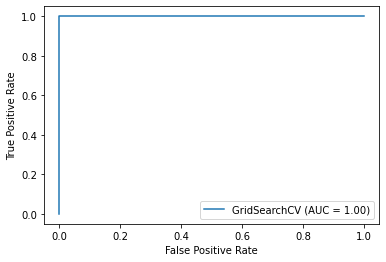

In [46]:
# plot ROC curve and calculate AUC marics
plot_roc_curve(gs_log_reg, x_test, y_test)

In [47]:
# confusion matrix 
print(confusion_matrix(y_test, y_preds))

[[67  0]
 [ 0 47]]


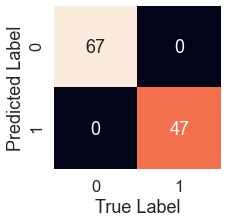

In [48]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
        """
        plots a nice looking confusion matrix using seaborn's heatmap()
        """
        fig, ax = plt.subplots(figsize=(3, 3))
        ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                         annot=True,
                         cbar=False)
        plt.xlabel("True Label")
        plt.ylabel("Predicted Label")
        
        
plot_conf_mat(y_test, y_preds)        

now we've got a ROC curve, an AUC matric and a confusion matrix, let's get a classification reports
as well as cross-validated precision, recall and f1-scor.e.

In [49]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        47

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



## Calculate evaluation metrics using cross-validation

we're going to calculate precision, recall, and f1-score of our model using cross-validation and to do so we''ll be using
`cross-val-score()`

In [50]:
#check the best hyperparameters
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [51]:
#create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score
#cross-validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc


array([0.92105263, 0.93859649, 0.98245614, 0.93859649, 0.94690265])

In [55]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9455208818506444

In [56]:
#cross-validated precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.9473427656354485

In [57]:
#cross-validated recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9060908084163897

In [58]:
#cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9250455946060248

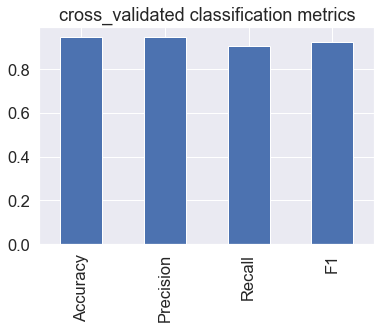

In [61]:
# visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                         index=[0])
                     #   index=[0]) #error  video 19(projact=milestine1_1)        

cv_metrics.T.plot.bar(title="cross_validated classification metrics",
                      legend=False)

## features importance

features importance is another as asking, "which features contributed most the outcomes of the 
model and how did they contribute??

finding features importance is different for each machine learning model. one way to find feature
importnace is to search for (MODEL NAME) feature importance".

let's find the features importance for our LogisticRegression model.

In [62]:
# fit an instance of LogisticRegression 
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(x_train, y_train);

In [63]:
#check coef
clf.coef_

array([[ 2.12070432e+00, -6.10019225e-01, -6.71715696e-02,
        -2.96885726e-01,  1.14872728e-02,  2.34974996e-02,
         1.05202342e-01,  1.46821352e-01,  6.50971335e-02,
         4.58328366e-02,  5.96869236e-03, -2.17208090e-02,
        -2.31119486e-01, -6.47652326e-02,  6.89749581e-02,
         1.37079708e-03,  1.86324342e-02,  2.75854214e-02,
         8.19625931e-03,  9.35281428e-03,  1.13366716e-03,
        -6.16887101e-01,  1.88995214e-01,  2.05445482e-01,
         1.24239274e-02,  4.08777297e-02,  3.31212080e-01,
         4.26558657e-01,  1.30280547e-01,  1.27273285e-01,
         3.18565767e-02]])

In [64]:
#match coef's of features to column
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'diagnosis': 2.1207043216911083,
 'radius_mean': -0.6100192249264242,
 'texture_mean': -0.06717156958990136,
 'perimeter_mean': -0.29688572555211307,
 'area_mean': 0.011487272807057212,
 'smoothness_mean': 0.023497499596644968,
 'compactness_mean': 0.10520234178795561,
 'concavity_mean': 0.14682135243179997,
 'concave points_mean': 0.06509713350553009,
 'symmetry_mean': 0.04583283659457606,
 'radius_se': 0.005968692355826664,
 'perimeter_se': -0.021720809037695358,
 'area_se': -0.23111948582625474,
 'compactness_se': -0.0647652325830974,
 'concavity_se': 0.0689749581284501,
 'concave points_se': 0.0013707970821387617,
 'radius_worst': 0.018632434155114907,
 'texture_worst': 0.027585421449980014,
 'perimeter_worst': 0.008196259305091226,
 'area_worst': 0.009352814282231083,
 'smoothness_worst': 0.0011336671627593527,
 'compactness_worst': -0.6168871014815279,
 'concavity_worst': 0.1889952135384227,
 'concave points_worst': 0.2054454822754014,
 'symmetry_worst': 0.012423927409006549,
 '

In [65]:
#match coef's of features to column
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'diagnosis': 2.1207043216911083,
 'radius_mean': -0.6100192249264242,
 'texture_mean': -0.06717156958990136,
 'perimeter_mean': -0.29688572555211307,
 'area_mean': 0.011487272807057212,
 'smoothness_mean': 0.023497499596644968,
 'compactness_mean': 0.10520234178795561,
 'concavity_mean': 0.14682135243179997,
 'concave points_mean': 0.06509713350553009,
 'symmetry_mean': 0.04583283659457606,
 'radius_se': 0.005968692355826664,
 'perimeter_se': -0.021720809037695358,
 'area_se': -0.23111948582625474,
 'compactness_se': -0.0647652325830974,
 'concavity_se': 0.0689749581284501,
 'concave points_se': 0.0013707970821387617,
 'radius_worst': 0.018632434155114907,
 'texture_worst': 0.027585421449980014,
 'perimeter_worst': 0.008196259305091226,
 'area_worst': 0.009352814282231083,
 'smoothness_worst': 0.0011336671627593527,
 'compactness_worst': -0.6168871014815279,
 'concavity_worst': 0.1889952135384227,
 'concave points_worst': 0.2054454822754014,
 'symmetry_worst': 0.012423927409006549,
 '

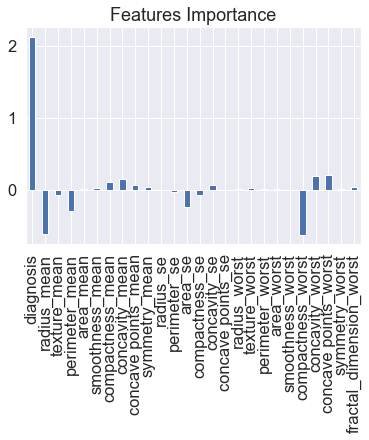

In [66]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Features Importance", legend=False);

In [67]:
pd.crosstab(df["diagnosis"], df["smoothness_worst"])

smoothness_worst,0.07117,0.08125,0.08409,0.08484,0.08567,0.08774,0.08799,0.08822,0.08864,0.08949,...,0.18620,0.18730,0.18780,0.18830,0.19020,0.19090,0.20060,0.20980,0.21840,0.22260
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,1,1,1,0,1,0,1,1,1


In [68]:
pd.crosstab(df["diagnosis"], df["area_mean"])

area_mean,143.5,170.4,178.8,181.0,201.9,203.9,221.2,221.3,221.8,224.5,...,1685.0,1686.0,1747.0,1761.0,1841.0,1878.0,2010.0,2250.0,2499.0,2501.0
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
